# Week 6 Homework
    - indexing, grouping, where, visulization with loops, enumerate

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
iris = pd.read_csv('iris.txt', sep = '\t')
ames = pd.read_csv('ames_housing.txt', sep = '\t')
titanic = pd.read_csv('titanic.txt', sep = '\t')
batting = pd.read_csv('batting.csv', sep = '\t')

## Problem 1: Iris Dataset


In [3]:
iris.head(8)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.5,4.2,1.4,0.2,setosa
1,5.6,3.0,4.5,1.5,versicolor
2,7.2,3.6,6.1,2.5,virginica
3,4.8,3.0,1.4,0.3,setosa
4,5.5,2.4,3.8,1.1,versicolor
5,5.8,2.7,3.9,1.2,versicolor
6,6.0,3.4,4.5,1.6,versicolor
7,7.7,3.0,6.1,2.3,virginica


In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris_means = iris.groupby('species').mean()
iris_means

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


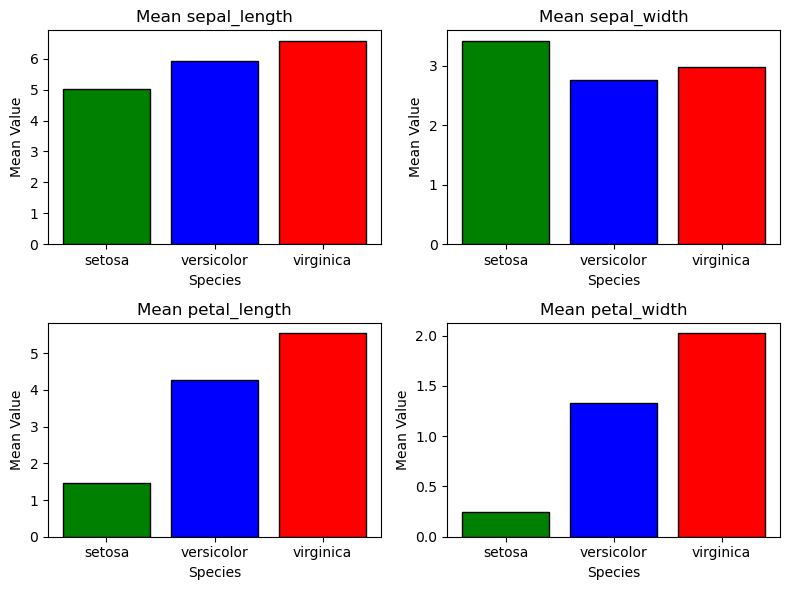

In [6]:
iris_colors = ['green', 'blue', 'red']
iris_columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

plt.figure(figsize = [8, 6])
for i, col in enumerate(iris_means.columns):  
    plt.subplot(2, 2, i + 1)
    plt.bar(iris_means.index, iris_means[col], color = iris_colors, edgecolor = 'black')
    plt.ylabel('Mean Value')
    plt.xlabel('Species')
    plt.title(f'Mean {col}')
plt.tight_layout()
plt.show()

## Problem 2: Ames Housing - Neighborhoods

In [7]:
ames.head(8)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500


In [8]:
# Print ames.columns.values.
print(ames.columns.values)

['Order' 'PID' 'MS SubClass' 'MS Zoning' 'Lot Frontage' 'Lot Area'
 'Street' 'Alley' 'Lot Shape' 'Land Contour' 'Utilities' 'Lot Config'
 'Land Slope' 'Neighborhood' 'Condition 1' 'Condition 2' 'Bldg Type'
 'House Style' 'Overall Qual' 'Overall Cond' 'Year Built' 'Year Remod/Add'
 'Roof Style' 'Roof Matl' 'Exterior 1st' 'Exterior 2nd' 'Mas Vnr Type'
 'Mas Vnr Area' 'Exter Qual' 'Exter Cond' 'Foundation' 'Bsmt Qual'
 'Bsmt Cond' 'Bsmt Exposure' 'BsmtFin Type 1' 'BsmtFin SF 1'
 'BsmtFin Type 2' 'BsmtFin SF 2' 'Bsmt Unf SF' 'Total Bsmt SF' 'Heating'
 'Heating QC' 'Central Air' 'Electrical' '1st Flr SF' '2nd Flr SF'
 'Low Qual Fin SF' 'Gr Liv Area' 'Bsmt Full Bath' 'Bsmt Half Bath'
 'Full Bath' 'Half Bath' 'Bedroom AbvGr' 'Kitchen AbvGr' 'Kitchen Qual'
 'TotRms AbvGrd' 'Functional' 'Fireplaces' 'Fireplace Qu' 'Garage Type'
 'Garage Yr Blt' 'Garage Finish' 'Garage Cars' 'Garage Area' 'Garage Qual'
 'Garage Cond' 'Paved Drive' 'Wood Deck SF' 'Open Porch SF'
 'Enclosed Porch' '3Ssn Porch' 'Sc

In [9]:
ames_nbhd = ames[['Neighborhood', 'SalePrice']].groupby('Neighborhood')\
    .mean().sort_values('SalePrice', ascending = True)
ames_nbhd.head(5)

,SalePrice
Neighborhood,
MeadowV,95756.486486
IDOTRR,103752.903226
BrDale,105608.333333
OldTown,123991.891213
BrkSide,124756.250000


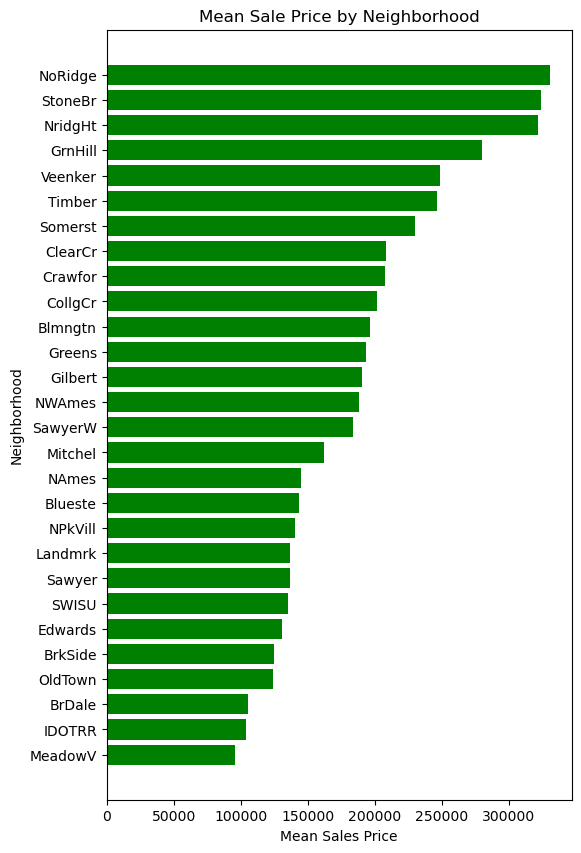

In [10]:
plt.figure(figsize = [6, 10])
plt.barh(ames_nbhd.index, ames_nbhd.SalePrice, color = 'green')
plt.xlabel('Mean Sales Price')
plt.ylabel('Neighborhood')
plt.title('Mean Sale Price by Neighborhood')
plt.show()

## Problem 3: Ames Housing – House Styles

In [11]:
ames_style = pd.DataFrame(ames.loc[:,['House Style', 'SalePrice']])\
    .groupby('House Style').count().sort_values('SalePrice', ascending = True)
ames_style.rename(columns = {'SalePrice': 'Count'}, inplace = True)
ames_style

,Count
House Style,
2.5Fin,8
1.5Unf,19
2.5Unf,24
SFoyer,83
SLvl,128
1.5Fin,314
2Story,873
1Story,1481


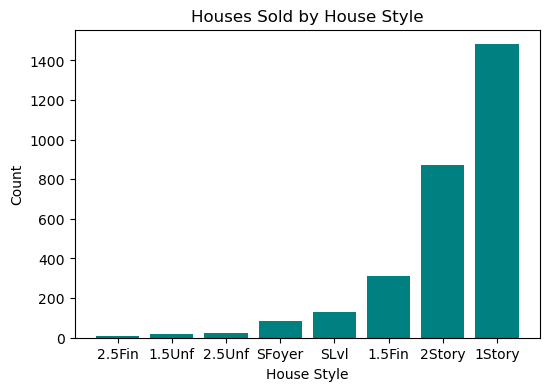

In [12]:
plt.figure(figsize = [6, 4])
plt.bar(ames_style.index, ames_style.Count, color = 'teal')
plt.xlabel('House Style')
plt.ylabel('Count')
plt.title('Houses Sold by House Style')
plt.show()

## Problem 4: Titanic Dataset – Survival Rates 

In [13]:
titanic.head(8)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750


In [14]:
print(f'Proportion of Passengers who survived: {np.round((np.mean(titanic["Survived"])), 4)}')

Proportion of Passengers who survived: 0.3856


In [15]:
surv_rates = titanic.loc[:, ['Pclass', 'Sex', 'Survived']].groupby(['Pclass', 'Sex']).mean()
surv_rates

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.137026

## Problem 5: Titanic Dataset – Sex Distribution by Class and Outcome

In [16]:
titanic['Female'] = np.where(titanic['Sex'] == 'female', 1, 0)
titanic['Male'] = np.where(titanic['Sex'] == 'male', 1, 0)
titanic.head(8)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Female,Male
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,0,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,1,0
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,1,0
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,1,0
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,0,1
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583,0,1
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625,0,1
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750,0,1


In [17]:
sex_dist_by_class = titanic.loc[:, ['Pclass', 'Female', 'Male']].groupby('Pclass').sum()
sex_dist_by_class

,Female,Male
Pclass,,
1,94,122
2,76,108
3,144,343


In [18]:
sex_dist_by_outcome = titanic.loc[:, ['Survived', 'Female', 'Male']].groupby('Survived').sum()
sex_dist_by_outcome

,Female,Male
Survived,,
0,81,464
1,233,109


## Problem 6: Batting Data – Home Runs

In [19]:
batting.head(5)

,"playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP"
0,"abercda01,1871,1,TRO,NA,1,4,0,0,0,0,0,0,0,0,0,..."
1,"addybo01,1871,1,RC1,NA,25,118,30,32,6,0,0,13,8..."
2,"allisar01,1871,1,CL1,NA,29,137,28,40,4,5,0,19,..."
3,"allisdo01,1871,1,WS3,NA,27,133,28,44,10,2,2,27..."
4,"ansonca01,1871,1,RC1,NA,25,120,29,39,11,3,0,16..."


In [20]:
batting.columns.values
# Print batting.columns.values.
# print(batting.columns.values)

array(['playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP'],
      dtype=object)

## All problems below give errors even when I used my old undergrad code for this assignment.  Is something wrong with the batting.csv file?

In [22]:
# No idea why this gives me an error with every single permutation I use to try to correct it.


total_hr = pd.DataFrame(batting.iloc[:,[3, 1, 11]]).groupby(['teamID', 'yearID'], as_index = False)\
    .sum().sort_values('HR', ascending = False)

total_hr = pd.DataFrame(batting.loc[:, ['teamID', 'yearID', 'HR']]).groupby(['teamID', 'yearID'], as_index = False)\
    .sum().sort_values('HR', ascending = False)

total_hr.head(10)

IndexError: positional indexers are out-of-bounds

In [23]:
# this does not work since previous chunk didn't work
avg_hr = total_hr.loc[:,['teanID', 'HR']].groupby('teamID').mean().sort_values('HR', ascending = False)  # ascending is default
avg_hr.head(10)

NameError: name 'total_hr' is not defined

## Problem 7: Batting Data – Batting Averages

In [24]:
batting_avg = batting.loc[:, ['teamID', 'yearID', 'H', 'AB']].groupby(['teamID', 'yearID'])\
    .sum(['H', 'AB'])
batting_avg['BA'] = batting_avg[H] / batting_avg['AB']
batting_avg.sort_values('BA', ascending = False).head(10)

KeyError: "None of [Index(['teamID', 'yearID', 'H', 'AB'], dtype='object')] are in the [columns]"

## Problem 8: Batting Data – Cardinals vs. Cubs

In [25]:
### ST LOUIS
sl = batting.loc[batting["teamID"] == 'SLN']  
stl_batting = sl.loc[batting['yearID'] >= 1900] 
stl_batting = stl_batting.iloc[:, [1, 8, 6, 11]] 
stl_batting = stl_batting.groupby('yearID').sum() 
stl_batting["BA"] = stl_batting["H"].div(stl_batting["AB"].values) 

### CHICAGO
cc = batting.loc[batting["teamID"] == 'CHN']       
chi_batting = cc.loc[batting['yearID'] >= 1900]    
chi_batting = chi_batting.iloc[:, [1, 8, 6, 11]]   
chi_batting = chi_batting.groupby('yearID').sum()  
chi_batting["BA"] = chi_batting["H"].div(chi_batting["AB"].values) 

KeyError: 'teamID'

ValueError: Incorrect use of keyword argument 'fontsize'. Keyword arguments other than 'minor' modify the text labels and can only be used if 'labels' are passed as well.

<Figure size 1200x400 with 0 Axes>

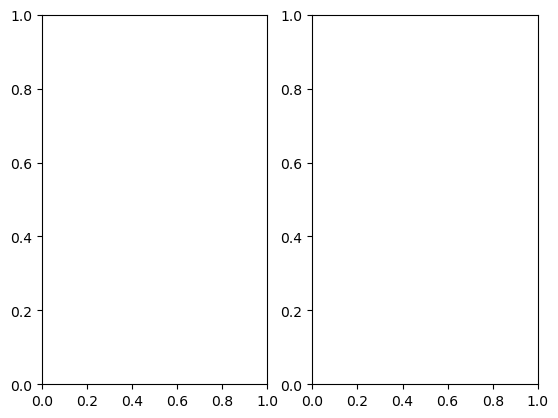

In [26]:
colors1 = ['maroon', 'navy']
fig = plt.figure(figsize=(12, 4)) 
fig, (ax1, ax2) = plt.subplots(1, 2) 

ax1.set_xticks(range(1900, 2030, 22), fontsize = 2)
ax2.set_xticks(range(1900, 2030, 22), fontsize = 2)
plt.yticks(fontsize = 8)

ax1.plot(chi_batting.index, chi_batting.iloc[:, 3], color = colors1[0])
ax1.plot(stl_batting.index, stl_batting.iloc[:, 3], color = colors1[1])
ax1.set_title('Batting Average By Year')
ax1.set_xlabel('Year', fontsize = 10)
ax1.set_ylabel('Batting Average', fontsize = 8)

ax2.plot(chi_batting.index, chi_batting.iloc[:, 2], color = colors1[0])
ax2.plot(stl_batting.index, stl_batting.iloc[:, 2], color = colors1[1])
ax2.set_title('Home Runs by Year')
ax2.set_xlabel('Year')
ax2.set_ylabel('Home Runs', fontsize = 8)

plt.tight_layout() 
plt.show()

In [27]:
display(round(np.mean(stl_batting.BA > chi_batting.BA),4))

NameError: name 'stl_batting' is not defined

In [28]:
display(round(np.mean(stl_batting.HR > chi_batting.HR),4))

NameError: name 'stl_batting' is not defined